In [63]:
# làm việc với mảng
import numpy as np 
# phân tích dữ liệu dạng bảng (dataframes)
import pandas as pd 
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split 
# mô hình hồi quy logistic
from sklearn.linear_model import LogisticRegression 
# tính toán độ chính xác của mô hình
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score 

import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Đọc dữ liệu từ file CSV và lưu vào dataframe
heart_data = pd.read_csv('D:/Project_VSCode_Python/cuoi_ky_hoc_may/heart_disease_data.csv') 

In [65]:
# hiển thị 5 hàng đầu tiên dữ liệu
heart_data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# hiển thị 5 hàng cuối cùng dữ liệu
heart_data.tail() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [67]:
# hiển thị số hàng và số cột dữ liệu
heart_data.shape 

(303, 14)

In [68]:
# Hiển thị thông tin chi tiết về dataframe bao gồm số lượng không-null và kiểu dữ liệu của mỗi cột
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
# Kiểm tra xem có giá trị null nào trong dữ liệu không
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
# Hiển thị thống kê tóm tắt của các cột số trong dữ liệu
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [71]:
# Đếm số lượng các giá trị khác nhau trong cột 'target'
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [72]:
# Tách các thuộc tính đầu vào (features) và nhãn (target)
# chứa thuộc tính đầu vào
X = heart_data.drop(columns='target', axis=1)
# chứa nhãn cột 'target'
Y = heart_data['target']

In [73]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [74]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [75]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# 20% dữ liệu sử dụng để kiểm tra, 80% để huấn luyện
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [76]:
# in kích thước tập dữ liệu gốc và tập huấn luyện và kiểm tra
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [77]:
# Khởi tạo mô hình hồi quy logistic
model = LogisticRegression()

In [78]:
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train)

d:\Data_Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:

X_train_prediction = model.predict(X_train)
# Tính toán độ chính xác của mô hình trên tập huấn luyện
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [80]:
# In ra độ chính xác của mô hình trên tập huấn luyện
print('Độ chính xác về dữ liệu đào tạo : ', training_data_accuracy)

Độ chính xác về dữ liệu đào tạo :  0.8512396694214877


In [81]:

X_test_prediction = model.predict(X_test)
# Tính toán độ chính xác của mô hình trên tập kiểm tra
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [82]:
# In ra độ chính xác của mô hình trên tập kiểm tra
print('Độ chính xác trên dữ liệu kiểm tra : ', test_data_accuracy)

Độ chính xác trên dữ liệu kiểm tra :  0.819672131147541


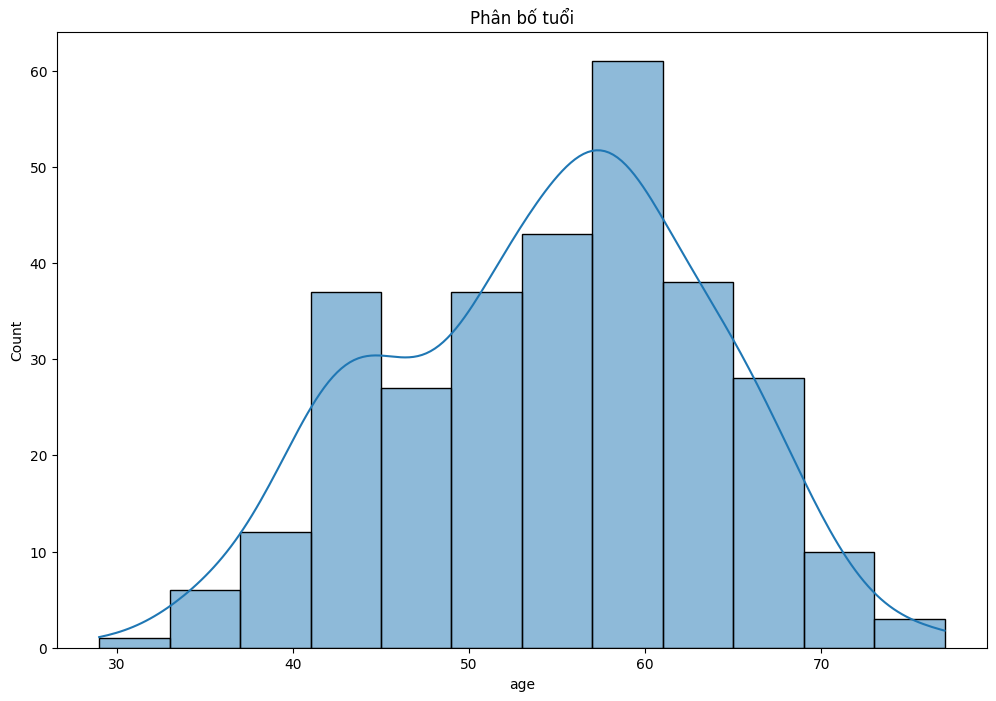

In [83]:
# Vẽ biểu đồ phân phối cho một số thuộc tính
plt.figure(figsize=(12, 8))
sns.histplot(heart_data['age'], kde=True)
plt.title('Phân bố tuổi')
plt.show()

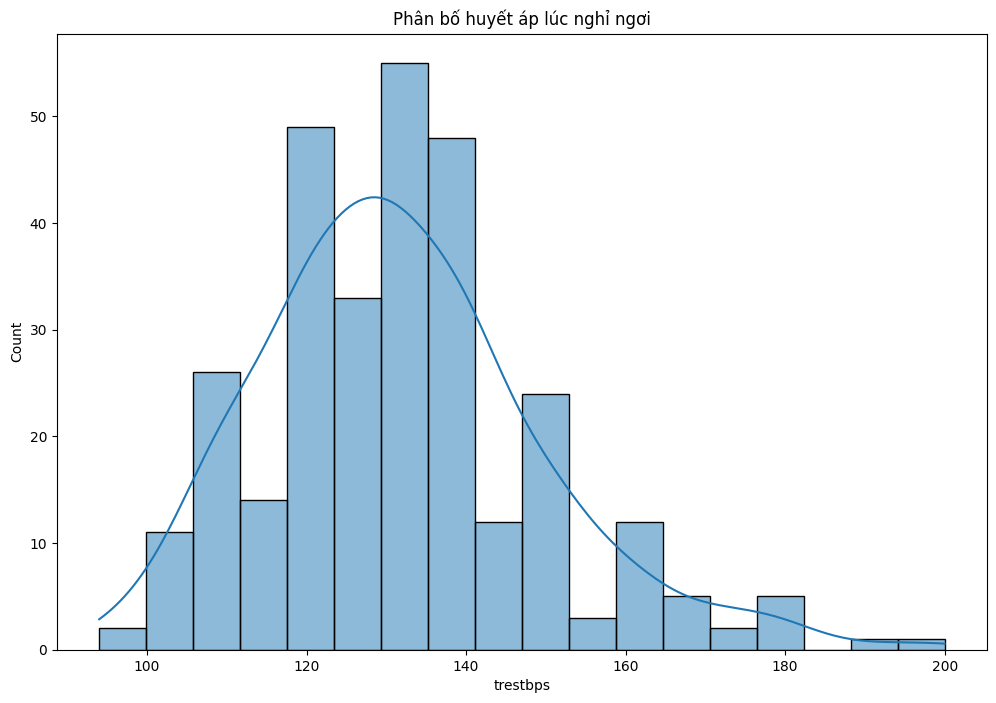

In [84]:
plt.figure(figsize=(12, 8))
sns.histplot(heart_data['trestbps'], kde=True)
plt.title('Phân bố huyết áp lúc nghỉ ngơi')
plt.show()

In [85]:
# Dự đoán cho một mẫu dữ liệu mới
# ví dụ là 0 không mắc bệnh tim
# input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
# ví dụ là 1 mắc bệnh tim
# input_data = (35,1,1,122,192,0,1,174,0,0,2,0,2) 
# ví dụ dữ liệu ngoài
input_data = (43,1,1,142,124,0,1,194,0,0,2,0,2)

# Chuyển đổi dữ liệu đầu vào thành mảng numpy
input_data_as_numpy_array= np.asarray(input_data)

# Định hình lại mảng numpy để phù hợp với mô hình
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# Dự đoán nhãn cho mẫu dữ liệu mới
prediction = model.predict(input_data_reshaped)
# In ra kết quả dự đoán
print(prediction)

if (prediction[0]== 0):
  print('Người đó không mắc bệnh tim')
else:
  print('Người đó mắc bệnh tim')

[1]
Người đó mắc bệnh tim


d:\Data_Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
